In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [2]:
df.drop('id', axis=1, inplace=True)

df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)

cat_cols = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,treatment_duration,gender_Male,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,29.4,199,0,0,1,0,0,523,True,...,False,False,False,True,False,False,True,False,False,False
1,50.0,41.2,280,1,1,0,0,1,424,False,...,False,True,False,True,False,False,True,False,False,True
2,65.0,44.0,268,1,1,0,0,0,370,False,...,False,True,False,True,True,False,False,True,False,False
3,51.0,43.0,241,1,1,0,0,0,443,False,...,False,False,False,False,False,False,True,False,False,False
4,37.0,19.7,178,0,0,0,0,0,406,True,...,False,False,False,False,False,False,True,True,False,False


In [5]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.7784775280898877

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.19      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.49      0.50      0.44    178000
weighted avg       0.65      0.78      0.68    178000



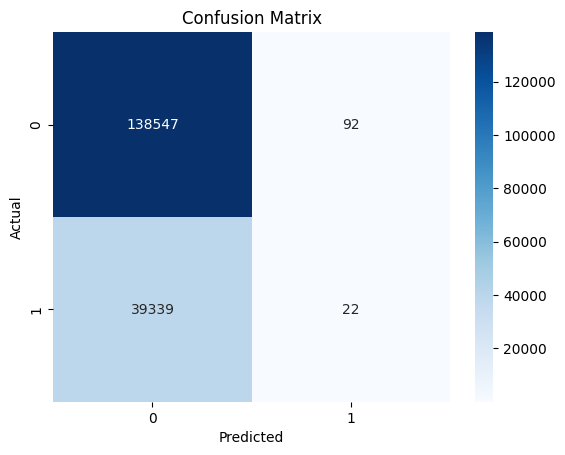

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()